# Linear Regression Implementation-01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('dhaka homeprices.csv')
#df = pd.read_csv ('Shopping_cse15_16.csv')

In [3]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


[]

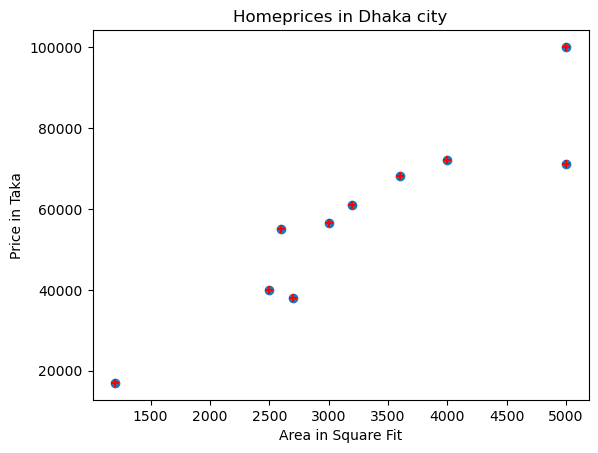

In [4]:
plt.xlabel('Area in Square Fit')
plt.ylabel('Price in Taka')

plt.scatter(df['area'],df['price'])
plt.scatter(df['area'], df['price'],color='red', marker='+')

plt.title('Homeprices in Dhaka city')
plt.plot()

In [5]:
x = df[['area']]
y = df['price']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.40, random_state =1)

#xtest
#xtrain

In [7]:
xtest


#xtrain

,area
2,3200
9,5000
6,2500
4,4000


In [8]:
xtrain

,area
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [9]:
ytest

2     61000
9    100000
6     40000
4     72000
Name: price, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg= LinearRegression ()

In [12]:
reg.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
LinearRegression ()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
reg.score(xtest,ytest)

0.7182056168655753

In [15]:
reg.predict([[3300]])

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55021.66064982])

In [16]:
reg.predict([[3200]])

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53572.839244])

In [17]:
reg.predict([[2850]])

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48501.96432364])

# Multiple Linear Regression Implementation-01

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [19]:
df = pd.read_csv("car data.csv")

In [20]:
df

,speed,car_age,experience,risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,NaN,60
4,140,5,3.0,82
5,115,2,8.0,10


In [21]:
null_values = df.isnull().sum

# Print the result
# print(null_values)

In [22]:
print(null_values)

<bound method DataFrame.sum of    speed   car_age  experience   risk
0   False    False       False  False
1   False    False       False  False
2   False    False       False  False
3   False    False        True  False
4   False    False       False  False
5   False    False       False  False>


In [23]:
null_count = df.isnull().sum()

# Print the result
print(null_count)

speed         0
car_age       0
experience    1
risk          0
dtype: int64


In [24]:
df.experience

0     5.0
1    13.0
2     4.0
3     NaN
4     3.0
5     8.0
Name: experience, dtype: float64

In [25]:
df.experience.mean()

np.float64(6.6)

In [26]:
df.experience.median()

5.0

In [27]:
exp_fit= df.experience.median()

In [28]:
exp_fit

5.0

In [29]:
df.experience = df.experience.fillna(exp_fit)

In [30]:
df.experience

0     5.0
1    13.0
2     4.0
3     5.0
4     3.0
5     8.0
Name: experience, dtype: float64

In [31]:
reg = linear_model.LinearRegression()

In [32]:
print(df.columns)

Index(['speed ', 'car_age', 'experience', 'risk'], dtype='object')


In [33]:
#Strip Leading/Trailing Spaces from Column Names:
#Sometimes column names may have invisible spaces. You can strip any leading/tr
# from the column names using:Strip Leading/Trailing Spaces from Column Names:


df.columns = df.columns.str.strip()

In [34]:
reg.fit(df[['speed', 'car_age', 'experience']], df['risk'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
#Predicting risk when speed,car_age and experience are given

reg.predict([[160,10,5]])

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.37146872])

In [36]:
reg.coef_

array([ 0.33059217,  1.61053246, -6.20772074])

In [37]:
reg.intercept_

np.float64(33.4100009104359)

In [38]:
# cross checking the predicted value with the value obtaned from the
# multiple linear regression equation as given below

160*0.33059217 + 10*1.61053246 + 5*-6.20772074 + 33.410000910435855

71.37146901043586

### Yes it is the same , Congratulations!!!

# Multiple Linear Regression Implementation-02

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
df= pd.read_csv('insurance.csv')

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## converting categorical values to numeric values

In [42]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [43]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [44]:
df.isnull().sum()
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [45]:
x = df.drop(columns='charges')

In [46]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [47]:
y = df['charges']

In [48]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr= LinearRegression ()

In [52]:
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
c = lr.intercept_

In [54]:
c

np.float64(-11827.733141795718)

In [55]:
m = lr.coef_

In [56]:
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

### Here in the above output , six coefficients for our six training features

In [57]:
y_pred_train = lr.predict(xtrain)

In [58]:
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

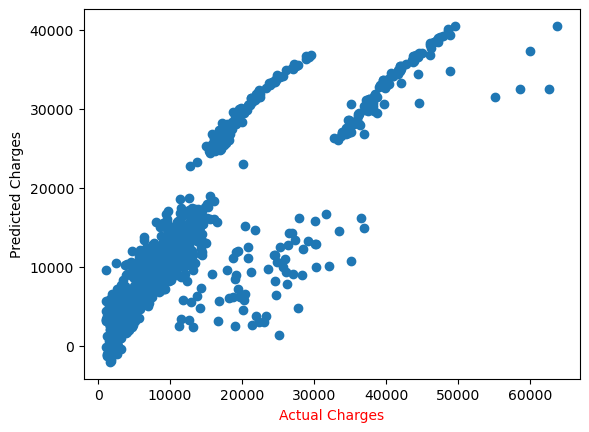

In [59]:
import matplotlib.pyplot as plt
plt.scatter(ytrain,y_pred_train)
#plt.xlabel('Actual Charges')
#plt.ylabel('Predicted Charges')
plt.xlabel('Actual Charges', color='red')
plt.ylabel('Predicted Charges', color='black')
plt.show()

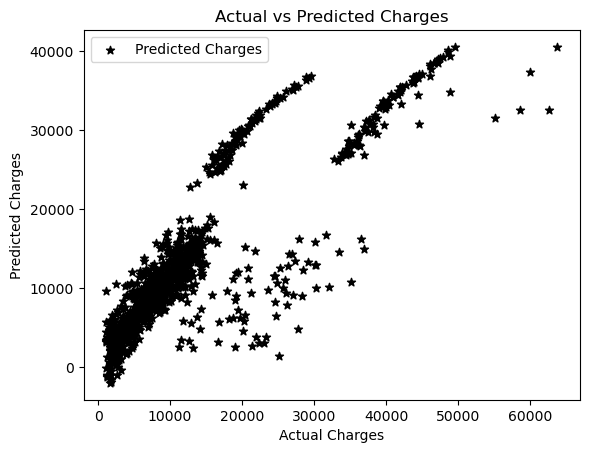

In [60]:
# Plot 'ytrain' using '*'
# plt.scatter(ytrain, ytrain, marker='*', label='Actual Charges', color='blue')

# Plot 'y_pred_train' using '+'
plt.scatter(ytrain, y_pred_train, marker='*', label='Predicted Charges', color='black')
            
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
            
# Add legend to differentiate between actual and predicted charges
plt.legend()
            
plt.show()

In [61]:
from sklearn.metrics import r2_score
r2_score (ytrain, y_pred_train)

0.7306840408360217

In [62]:
y_pred_test = lr.predict(xtest)

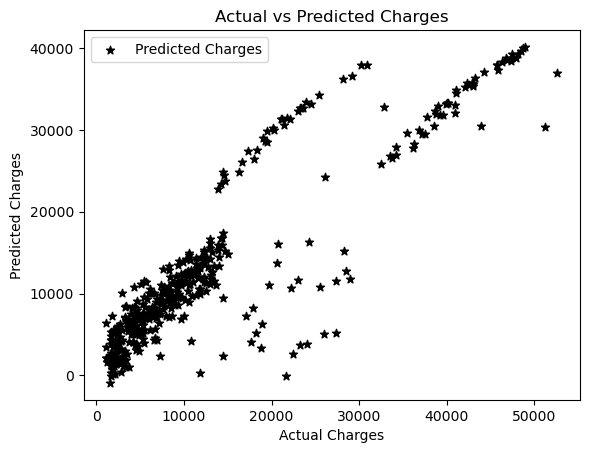

In [63]:
# Plot 'ytest' using '*'
#plt.scatter(ytest, ytest, marker='*', label='Actual Charges', color='blue')

# Plot 'y_pred_train' using '+'
plt.scatter(ytest, y_pred_test, marker='*', label='Predicted Charges', color='black')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

# Add legend to differentiate between actual and predicted charges
plt.legend()

plt.show()

In [64]:
r2_score (ytest, y_pred_test)

0.7911113876316933

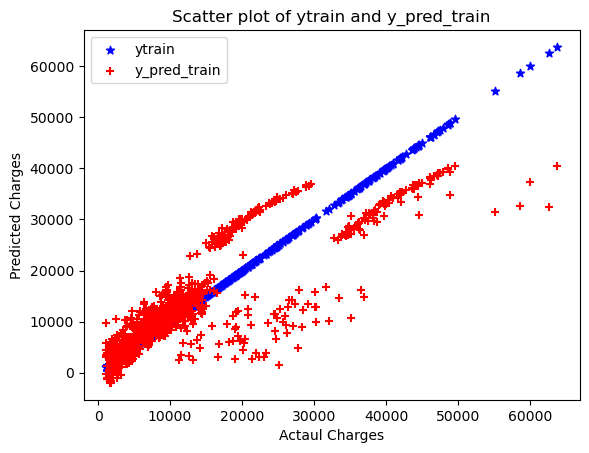

In [65]:
# Create scatter plot
plt.scatter(ytrain, ytrain, marker='*', label='ytrain', color='blue') # ytrain w
plt.scatter(ytrain, y_pred_train, marker='+', label='y_pred_train', color='red') # y_p

# Add labels and legend
plt.xlabel('Actaul Charges')
plt.ylabel('Predicted Charges')
plt.title('Scatter plot of ytrain and y_pred_train')
plt.legend()

# Show plot
plt.show()

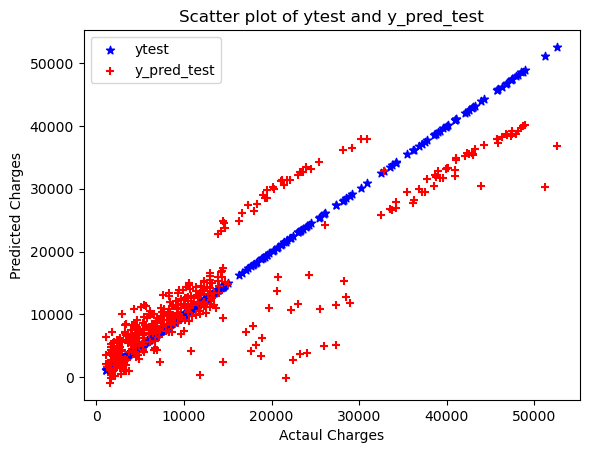

In [66]:
# Create scatter plot
plt.scatter(ytest, ytest, marker='*', label='ytest', color='blue') # ytrain with
plt.scatter(ytest, y_pred_test, marker='+', label='y_pred_test', color='red') # y_pred

# Add labels and legend
plt.xlabel('Actaul Charges')
plt.ylabel('Predicted Charges')
plt.title('Scatter plot of ytest and y_pred_test')
plt.legend()

# Show plot
plt.show()